In [9]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed
Libraries imported.


In [10]:
CLIENT_ID = 'KSMKSXS2S2KQ43DKCTPOM53JRAF03WPHS1KQA0AO5H4XODUQ' # your Foursquare ID
CLIENT_SECRET = '532IXFRDSOZC3S4QZ4R4O14YZO3QFDA2SDHO21DW4YFS0ORC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KSMKSXS2S2KQ43DKCTPOM53JRAF03WPHS1KQA0AO5H4XODUQ
CLIENT_SECRET:532IXFRDSOZC3S4QZ4R4O14YZO3QFDA2SDHO21DW4YFS0ORC


In [11]:
address = 'Schiphol'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

52.3080392 4.7621975


In [12]:
search_query = 'financial'
radius = 25000
print(search_query + ' .... OK!')
search_query = 'banking'
radius = 25000
print(search_query + ' .... OK!')
search_query = 'investment'
radius = 25000
print(search_query + ' .... OK!')
search_query = 'trading'
radius = 25000
print(search_query + ' .... OK!')

financial .... OK!
banking .... OK!
investment .... OK!
trading .... OK!


In [13]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=KSMKSXS2S2KQ43DKCTPOM53JRAF03WPHS1KQA0AO5H4XODUQ&client_secret=532IXFRDSOZC3S4QZ4R4O14YZO3QFDA2SDHO21DW4YFS0ORC&ll=52.3080392,4.7621975&v=20180604&query=trading&radius=25000&limit=30'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d4090cf86bc49002cdc485c'},
 'response': {'venues': [{'id': '4e636460cc3f7bb374132d83',
    'name': 'Hardware shop @ Aljunied (Power-J Trading Pte Ltd)',
    'location': {'address': '86 Lorong 25A Geylang',
     'crossStreet': 'Off Sims Avenue',
     'lat': 52.345276451477034,
     'lng': 4.768195152282715,
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.345276451477034,
       'lng': 4.768195152282715}],
     'distance': 4165,
     'postalCode': '388263',
     'cc': 'NL',
     'city': 'Singapore',
     'country': 'Nederland',
     'formattedAddress': ['86 Lorong 25A Geylang (Off Sims Avenue)',
      '388263 Singapore',
      'Nederland']},
    'categories': [{'id': '4bf58dd8d48988d112951735',
      'name': 'Hardware Store',
      'pluralName': 'Hardware Stores',
      'shortName': 'Hardware',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/hardware_',
       'suffix': '.png'},
      'primary': True}],
    'refer

In [18]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.country,location.formattedAddress,location.state,venuePage.id
0,4e636460cc3f7bb374132d83,Hardware shop @ Aljunied (Power-J Trading Pte ...,"[{'id': '4bf58dd8d48988d112951735', 'name': 'H...",v-1564512463,False,86 Lorong 25A Geylang,Off Sims Avenue,52.345276,4.768195,"[{'label': 'display', 'lat': 52.34527645147703...",4165,388263,NL,Singapore,Nederland,"[86 Lorong 25A Geylang (Off Sims Avenue), 3882...",NaN,NaN
1,4de6293a45dda52a06059842,Marine Trading International,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1564512463,False,NaN,NaN,52.271406,4.776675,"[{'label': 'display', 'lat': 52.271406, 'lng':...",4195,NaN,NL,Aalsmeer,Nederland,"[Aalsmeer, Nederland]",Noord-Holland,NaN
2,4d89b70299c2a1cd667a80d7,Robel Trading Telecom Aalsmeer,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E...",v-1564512463,False,NaN,NaN,52.267392,4.749297,"[{'label': 'display', 'lat': 52.26739176527938...",4609,NaN,NL,NaN,Nederland,[Nederland],NaN,NaN
3,4d934e6a62ad5481e7be7e4b,Maximum Trading B.V.,[],v-1564512463,False,Amstelveenseweg 645,NaN,52.331886,4.857480,"[{'label': 'display', 'lat': 52.331885725, 'ln...",7005,NaN,NL,Amsterdam,Nederland,"[Amstelveenseweg 645, Amsterdam, Nederland]",Noord-Holland,NaN
4,5d19ab7fb55cb800231335a3,STX Commodities Trading Desk,"[{'id': '56aa371be4b08b9a8d573517', 'name': 'B...",v-1564512463,False,Vijzelstraat 79,NaN,52.364138,4.892859,"[{'label': 'display', 'lat': 52.364138, 'lng':...",10862,1017 HG,NL,Amsterdam,Nederland,"[Vijzelstraat 79, 1017 HG Amsterdam, Nederland]",Noord-Holland,NaN


In [17]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

datagoed = dataframe_filtered.drop(['name', 'categories', 'labeledLatLngs', 'cc', 'country', 'formattedAddress', 'address', 'crossStreet', 'postalCode', 'id', 'distance','state'], axis=1)

datagoed

,lat,lng,city
0,52.345276,4.768195,Singapore
1,52.271406,4.776675,Aalsmeer
2,52.267392,4.749297,NaN
3,52.331886,4.857480,Amsterdam
4,52.364138,4.892859,Amsterdam
5,52.296101,4.659543,Hoofddorp
6,52.336525,4.874767,Amsterdam
7,52.347289,4.856089,Amsterdam
8,52.266761,4.650915,NaN
9,52.360310,4.886611,Amsterdam


In [19]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [20]:
print(datagoed.describe())

             lat        lng
count  30.000000  30.000000
mean   52.346447   4.789998
std     0.055028   0.119811
min    52.253236   4.565286
25%    52.332441   4.659532
50%    52.350022   4.847171
75%    52.375758   4.891890
max    52.490590   4.921689


In [36]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [52.346447, 4.789998],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(mapmooi)

mapmooi

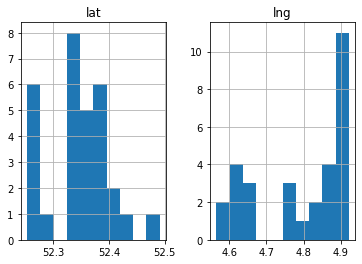

In [38]:
datagoed.hist()
plt.show()

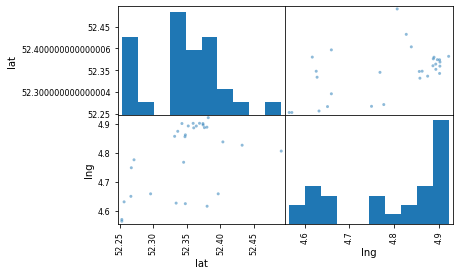

In [39]:
scatter_matrix(datagoed)
plt.show()

In [40]:
array = dataframe_filtered.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
lat = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=lat)

In [41]:
lat = 7
scoring = 'accuracy'

In [42]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [43]:
feature_cols = ['lat', 'lng']
X = datagoed[feature_cols] # Features
y = datagoed.lng # Target variable

In [44]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)